# Heart Disease Model Building Project
In this Term Project, the Heart Disease dataset will be analyzed to find out which feature(s) are the most related or most predictive of heart disease in the general population. The dataset can be downloaded from here: (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download. People die every year from heart disease (e.g., coronary artery disease, arrythmias, heart valve disease and heart failure). We will build and evaluate a logistic regression model to predict if a person has heart disease and describe which features are useful in predicting this. <br>


### Table of Contents 
$\bullet$  Exploring the Data <br>
$\bullet$  Preparing the Data for Modeling <br>
$\bullet$  Train and Evaluate the Model <br>

In [170]:
! pip install yellowbrick
import yellowbrick

In [171]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

In [172]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)
print('yellowbrick version:', yellowbrick.__version__)

pandas version: 1.2.4
numpy version: 1.19.5
scikit-learn version: 0.24.1
yellowbrick version: 1.3.post1


## Exploring the Data

In [173]:
#load the Titanic data into a dataframe
df = pd.read_csv('heart_2020_cleaned.csv') 
#display the first few rows of data
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [174]:
#display the dimensions of the dataframe
df.shape

(319795, 18)

### Observations

$\bullet$ The dataset has $319795$ rows and $18$ columns <br>
$\bullet$ All of the features will be useful in this analysis. Any categorical features will have dummy variables assigned to them for modeling <br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'HeartDisease': No means no heart disease reported, Yes means heart disease reported

In [175]:
#look at the column data types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [176]:
#get summary statistics of the numerical data
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [177]:
#get summary statistics of the non-numerical data
df.describe(include = ['O'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### Observations

$\bullet$ There is no missing data to deal with (all features have 319795 observations which make them complete) <br>

In [178]:
# Convert HeartDisease string to binary options (No is 0 and Yes is 1)
df['HeartDisease'] = df.HeartDisease.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [179]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Numerical Data Feature Exploration

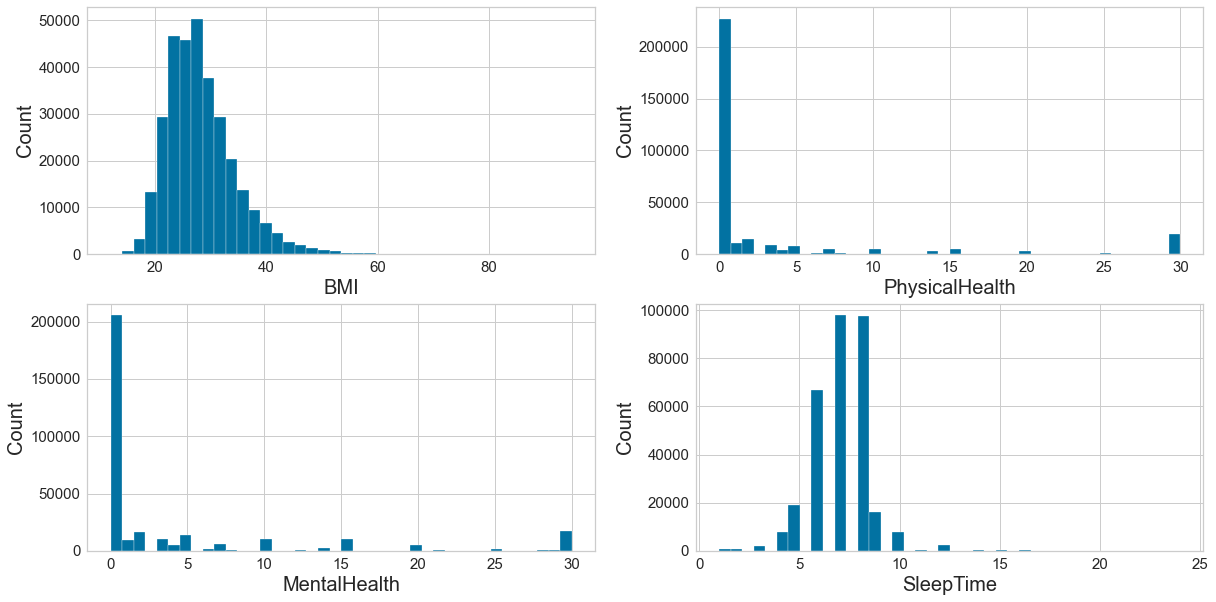

In [180]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    #ax.xaxis.label.set_color('white')
    ax.set_ylabel(yaxes[idx], fontsize=20)
   # ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', labelsize=15) #colors='white')
plt.show()

### Observations

$\bullet$ Most people in the dataset have a BMI between 20 and 40 <br>
$\bullet$ Most people in the dataset exercise between 0-5 days in the past 30 days <br>
$\bullet$ Most people in the dataset have 0-5 bad mental health days in the past 30 days <br>
$\bullet$ Most people in the dataset get between 5-9 hours of sleep a night <br>

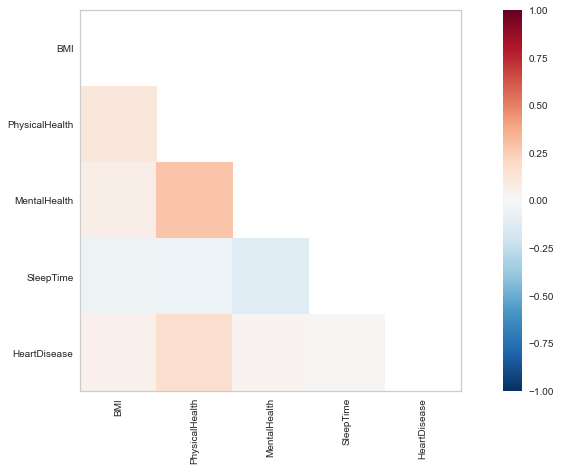

In [181]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = num_features.copy()
#add 'Survived' to the heat map features
heat_map_features.append('HeartDisease')
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()          

### Observations

$\bullet$ The numerical feature most highly correlated with 'HeartDisease' is 'PhysicalHealth' <br>
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

### Categorical Data Feature Exploration

In [185]:
# To support the Spearman Correlation Matrix, create dummy variables for the object type columns to get all the drop-down options into their own columns
df2 = pd.concat([df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1), pd.get_dummies(df[['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']])], axis=1)
df2.head(5)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [186]:
# move HeartDisease_Yes to the first column spot
column_to_reorder = df2.pop('HeartDisease')
df2.insert(0, 'HeartDisease', column_to_reorder)
df2.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [187]:
# Create a Spearman Correlation Matrix: Relationship between the categorical and non-categorical variables
df2.corr('spearman').style.background_gradient(cmap="Blues")

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
HeartDisease,1.000000,0.057355,0.143064,-0.003444,0.007521,-0.107764,0.107764,0.032080,-0.032080,-0.196835,0.196835,-0.201258,0.201258,-0.070040,0.070040,-0.075385,-0.065759,-0.065611,-0.066685,-0.059196,-0.049733,-0.032648,-0.013276,0.016152,0.042626,0.082578,0.098690,0.143041,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.170977,0.016182,0.183072,-0.013930,0.100030,-0.100030,-0.116042,0.147954,0.039033,0.174662,-0.101886,-0.041444,0.041444,-0.145197,0.145197,-0.093317,0.093317
BMI,0.057355,1.000000,0.093134,0.024011,-0.064533,-0.028788,0.028788,0.039295,-0.039295,-0.021597,0.021597,-0.154506,0.154506,-0.064332,0.064332,-0.126873,-0.034811,-0.004537,0.014903,0.032061,0.047434,0.053273,0.043527,0.033760,0.027822,0.004235,-0.021306,-0.095123,0.026708,-0.087101,0.076363,0.026599,0.008243,-0.043445,-0.206610,0.050316,0.201951,0.005599,0.136725,-0.136725,-0.192272,0.109994,0.126336,0.042862,-0.044543,-0.076800,0.076800,-0.048328,0.048328,0.026914,-0.026914
PhysicalHealth,0.143064,0.093134,1.000000,0.276983,-0.079916,-0.092659,0.092659,0.012853,-0.012853,-0.116252,0.116252,-0.355052,0.355052,0.062744,-0.062744,-0.024341,-0.027438,-0.025344,-0.023281,-0.019066,-0.008614,0.006397,0.019442,0.027004,0.011022,0.011868,0.013039,0.018517,0.019108,-0.039085,0.016052,-0.012951,0.015490,0.000907,-0.136290,0.019338,0.138636,0.005802,0.183149,-0.183149,-0.209589,0.299630,0.027281,0.328406,-0.169042,-0.133397,0.133397,-0.122558,0.122558,-0.032555,0.032555
MentalHealth,-0.003444,0.024011,0.276983,1.000000,-0.132638,-0.050658,0.050658,-0.056525,0.056525,-0.026438,0.026438,-0.107651,0.107651,0.137340,-0.137340,0.119557,0.084244,0.068923,0.056060,0.036191,0.026357,0.013537,0.000321,-0.029892,-0.062354,-0.076074,-0.078905,-0.102625,0.014166,-0.020907,0.004124,-0.002033,0.028475,-0.009887,-0.005192,0.004283,-0.002794,0.024726,0.042506,-0.042506,-0.116600,0.122086,0.017055,0.133772,-0.048001,-0.120809,0.120809,-0.022834,0.022834,0.048016,-0.048016
SleepTime,0.007521,-0.064533,-0.079916,-0.132638,1.000000,0.035726,-0.035726,0.003927,-0.003927,-0.009227,0.009227,0.032894,-0.032894,0.017853,-0.017853,0.018542,-0.019822,-0.041772,-0.049279,-0.044768,-0.040506,-0.039921,-0.033470,-0.010693,0.031262,0.054879,0.063770,0.094476,-0.006002,-0.021522,-0.040592,-0.012336,-0.034507,0.057541,0.005721,-0.007632,0.000287,-0.012080,-0.018208,0.018208,0.051973,-0.049495,-0.019557,-0.042917,0.023103,0.052818,-0.052818,-0.002513,0.002513,-0.046938,0.046938
Smoking_No,-0.107764,-0.028788,-0.092659,-0.050658,0.035726,1.000000,-1.000000,0.111768,-0.111768,0.061226,-0.061226,0.120074,-0.120074,0.085052,-0.085052,0.138397,0.052149,0.015226,-0.004290,-0.010680,0.006637,0.011667,-0.008701,-0.031892,-0.030367,-0.045288,-0.048040,-0.013569,-0.035667,0.060308,0.038249,0.066873,-0.016205,-0.072367,0.055127,-0.007143,-0.058434,0.005385,-0.097174,0.097174,0.117444,-0.095620,-0.059651,-0.086520,0.052305,0.024149,-0.024149,0.034920,-0.034920,0.033977,-0.033977
Smoking_Yes,0.107764,0.028788,0.092659,0.050658,-0.035726,-1.000000,1.000000,-0.111768,0.111768,-0.061226,0.061226,-0.120074,0.120074,-0.085052,0.085052,-0.138397,-0.052149,-0.015226,0.004290,0.010680,-0.

### Observations

$\bullet$ The categorical features most highly correlated with 'HeartDisease' are 'Stroke_Yes', 'DiffWalking_Yes', 'AgeCategory_80 or older', 'Diabetic_Yes', 'GenHealth_Fair', 'GenHealth_Poor', 'KidneyDisease_Yes' <br>
$\bullet$ There is not significant collinearity between the features (Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present)

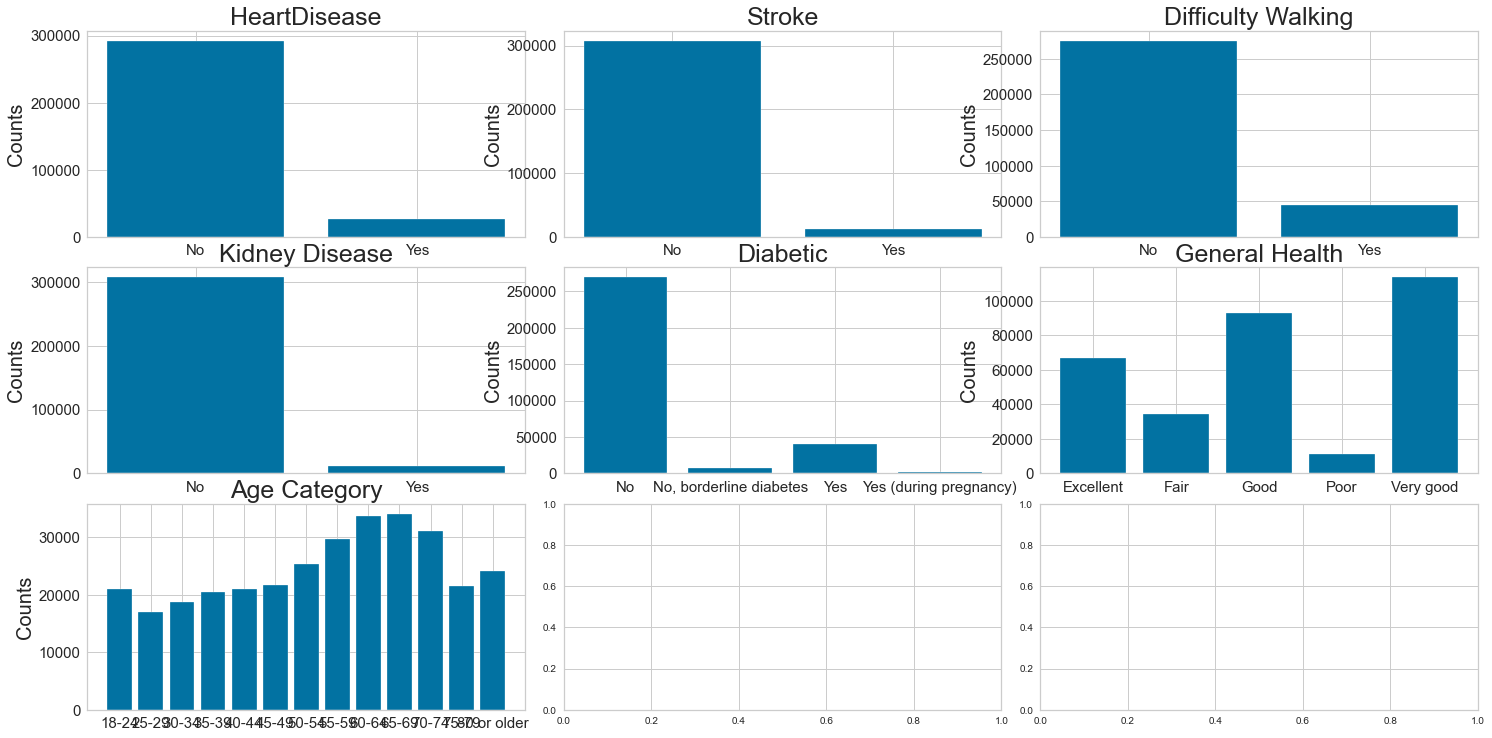

In [188]:
# create bar charts of some of the categorical features
#Categorical features with the highest correlation to HeartDisease: 'Stroke, 'DiffWalking', 'AgeCategory', 'Diabetic, 'GenHealth' 'KidneyDisease' 
#create a copy of the data frame for use with graphing
df_plots = df.copy()
df_plots = df.replace({'HeartDisease': {1: 'Yes', 0: 'No'}})

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.tight_layout()

# make the data read to feed into the visulizer
X_HeartDisease = df_plots.groupby('HeartDisease').size().reset_index(name='Counts')['HeartDisease']
Y_HeartDisease = df_plots.groupby('HeartDisease').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_HeartDisease, Y_HeartDisease)
axes[0, 0].set_title('HeartDisease', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Categorical features to use:'Stroke, 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth' 'KidneyDisease' 
# make the data read to feed into the visulizer
X_Smoking = df_plots.groupby('Stroke').size().reset_index(name='Counts')['Stroke']
Y_Smoking = df_plots.groupby('Stroke').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Smoking, Y_Smoking)
axes[0, 1].set_title('Stroke', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df_plots.groupby('DiffWalking').size().reset_index(name='Counts')['DiffWalking']
Y_Sex = df_plots.groupby('DiffWalking').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 2].bar(X_Sex, Y_Sex)
axes[0, 2].set_title('Difficulty Walking', fontsize=25)
axes[0, 2].set_ylabel('Counts', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_AgeCategory = df_plots.groupby('AgeCategory').size().reset_index(name='Counts')['AgeCategory']
Y_AgeCategory = df_plots.groupby('AgeCategory').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2, 0].bar(X_AgeCategory, Y_AgeCategory)
axes[2, 0].set_title('Age Category', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Diabetic = df_plots.groupby('Diabetic').size().reset_index(name='Counts')['Diabetic']
Y_Diabetic = df_plots.groupby('Diabetic').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Diabetic, Y_Diabetic)
axes[1, 1].set_title('Diabetic', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_GenHealth = df_plots.groupby('GenHealth').size().reset_index(name='Counts')['GenHealth']
Y_GenHealth = df_plots.groupby('GenHealth').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 2].bar(X_GenHealth, Y_GenHealth)
axes[1, 2].set_title('General Health', fontsize=25)
axes[1, 2].set_ylabel('Counts', fontsize=20)
axes[1, 2].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_KidneyDisease = df_plots.groupby('KidneyDisease').size().reset_index(name='Counts')['KidneyDisease']
Y_KidneyDisease = df_plots.groupby('KidneyDisease').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_KidneyDisease, Y_KidneyDisease)
axes[1, 0].set_title('Kidney Disease', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
plt.show()

### Observations

$\bullet$ Most people in the dataset do not develop heart disease <br>
$\bullet$ Most people in the dataset do not develop stroke <br>
$\bullet$ Most people in the dataset do not have difficulty walking <br>
$\bullet$ Most people in the dataset do not have kidney disease <br>
$\bullet$ Most people in the dataset do not have diabetes, pre-diabetes or gestational diabetes <br>
$\bullet$ Most people in the dataset have Excellent, Good or Fair general health <br>
$\bullet$ The dataset age categories span from the lowest at 16955 (ages 25-29) and highest at 34151 (ages 65-59) <br>

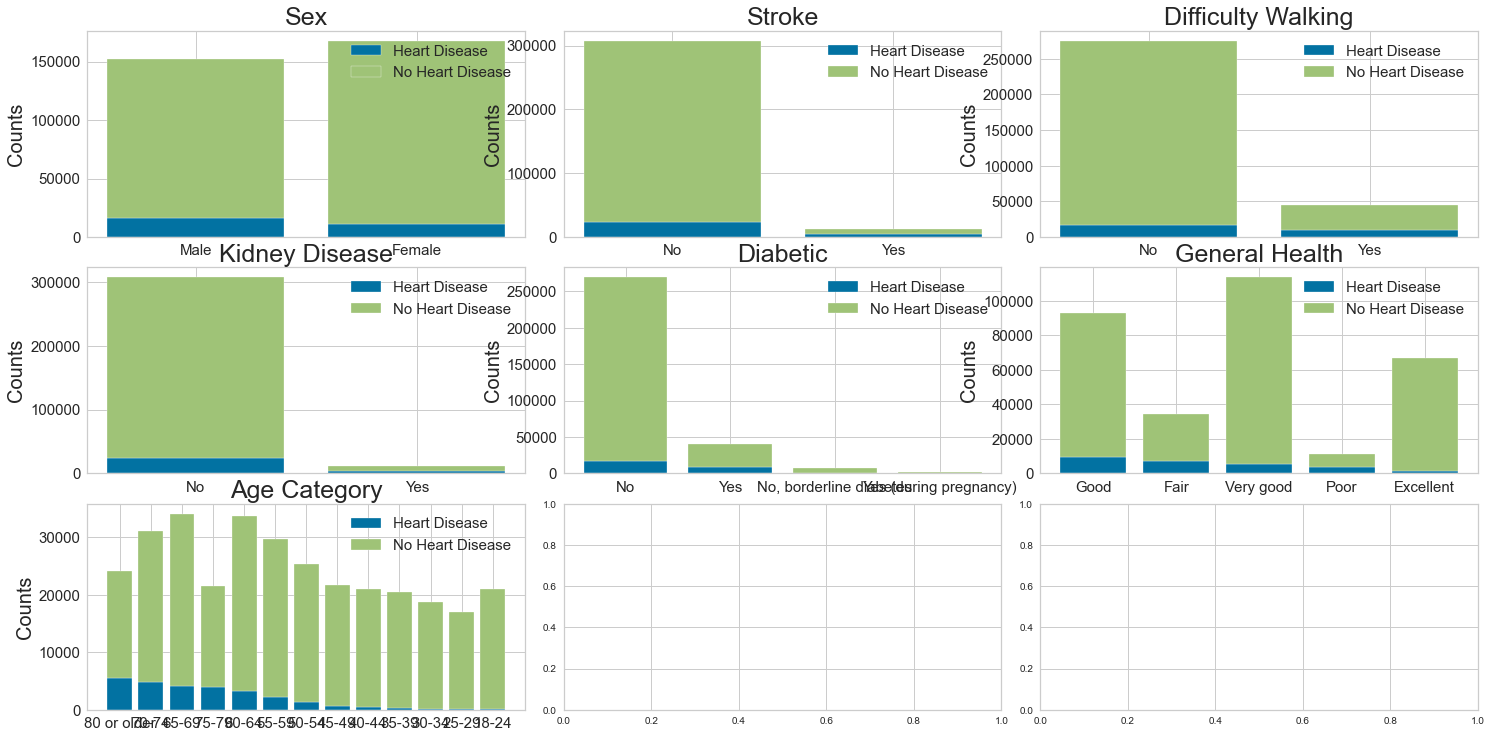

In [189]:
#stacked bar charts to compare heart disease and no heart disease by the most correlated features

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.tight_layout()

# make the data read to feed into the visulizer
Sex_heartdisease = df_plots[df['HeartDisease']==1]['Sex'].value_counts()
Sex_not_heartdisease = df_plots[df['HeartDisease']==0]['Sex'].value_counts()
Sex_not_heartdisease = Sex_not_heartdisease.reindex(index = Sex_heartdisease.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_heartdisease.index, Sex_heartdisease.values)
p2 = axes[0, 0].bar(Sex_not_heartdisease.index, Sex_not_heartdisease.values, bottom=Sex_heartdisease.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
Stroke_heartdisease = df_plots[df['HeartDisease']==1]['Stroke'].value_counts()
Stroke_not_heartdisease = df_plots[df['HeartDisease']==0]['Stroke'].value_counts()
Stroke_not_heartdisease = Stroke_not_heartdisease.reindex(index = Stroke_heartdisease.index)
# make the bar plot
p3 = axes[0, 1].bar(Stroke_heartdisease.index, Stroke_heartdisease.values)
p4 = axes[0, 1].bar(Stroke_not_heartdisease.index, Stroke_not_heartdisease.values, bottom=Stroke_heartdisease.values)
axes[0, 1].set_title('Stroke', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
DiffWalking_heartdisease = df_plots[df['HeartDisease']==1]['DiffWalking'].value_counts()
DiffWalking_not_heartdisease = df_plots[df['HeartDisease']==0]['DiffWalking'].value_counts()
DiffWalking_not_heartdisease = DiffWalking_not_heartdisease.reindex(index = DiffWalking_heartdisease.index)
# make the bar plot
p5 = axes[0, 2].bar(DiffWalking_heartdisease.index, DiffWalking_heartdisease.values)
p6 = axes[0, 2].bar(DiffWalking_not_heartdisease.index, DiffWalking_not_heartdisease.values, bottom=DiffWalking_heartdisease.values)
axes[0, 2].set_title('Difficulty Walking', fontsize=25)
axes[0, 2].set_ylabel('Counts', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)
axes[0, 2].legend((p5[0], p6[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)


# make the data read to feed into the visualizer
Diabetic_heartdisease = df_plots[df['HeartDisease']==1]['Diabetic'].value_counts()
Diabetic_not_heartdisease = df_plots[df['HeartDisease']==0]['Diabetic'].value_counts()
Diabetic_not_heartdisease = Diabetic_not_heartdisease.reindex(index = Diabetic_heartdisease.index)
# make the bar plot
p7 = axes[1, 1].bar(Diabetic_heartdisease.index, Diabetic_heartdisease.values)
p8 = axes[1, 1].bar(Diabetic_not_heartdisease.index, Diabetic_not_heartdisease.values, bottom=Diabetic_heartdisease.values)
axes[1, 1].set_title('Diabetic', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
GenHealth_heartdisease = df_plots[df['HeartDisease']==1]['GenHealth'].value_counts()
GenHealth_not_heartdisease = df_plots[df['HeartDisease']==0]['GenHealth'].value_counts()
GenHealth_not_heartdisease = GenHealth_not_heartdisease.reindex(index = GenHealth_heartdisease.index)
# make the bar plot
p7 = axes[1, 2].bar(GenHealth_heartdisease.index, GenHealth_heartdisease.values)
p8 = axes[1, 2].bar(GenHealth_not_heartdisease.index, GenHealth_not_heartdisease.values, bottom=GenHealth_heartdisease.values)
axes[1, 2].set_title('General Health', fontsize=25)
axes[1, 2].set_ylabel('Counts', fontsize=20)
axes[1, 2].tick_params(axis='both', labelsize=15)
axes[1, 2].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
KidneyDisease_heartdisease = df_plots[df['HeartDisease']==1]['KidneyDisease'].value_counts()
KidneyDisease_not_heartdisease = df_plots[df['HeartDisease']==0]['KidneyDisease'].value_counts()
KidneyDisease_not_heartdisease = KidneyDisease_not_heartdisease.reindex(index = KidneyDisease_heartdisease.index)
# make the bar plot
p7 = axes[1, 0].bar(KidneyDisease_heartdisease.index, KidneyDisease_heartdisease.values)
p8 = axes[1, 0].bar(KidneyDisease_not_heartdisease.index, KidneyDisease_not_heartdisease.values, bottom=KidneyDisease_heartdisease.values)
axes[1, 0].set_title('Kidney Disease', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)

# make the data read to feed into the visualizer
Age_heartdisease = df_plots[df['HeartDisease']==1]['AgeCategory'].value_counts()
Age_not_heartdisease = df_plots[df['HeartDisease']==0]['AgeCategory'].value_counts()
Age_not_heartdisease = Age_not_heartdisease.reindex(index = Age_heartdisease.index)
# make the bar plot
p7 = axes[2, 0].bar(Age_heartdisease.index, Age_heartdisease.values)
p8 = axes[2, 0].bar(Age_not_heartdisease.index, Age_not_heartdisease.values, bottom=Age_heartdisease.values)
axes[2, 0].set_title('Age Category', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p7[0], p8[0]), ('Heart Disease', 'No Heart Disease'), fontsize = 15)
plt.show()

### Observations

$\bullet$ Most people in the dataset do not have heart disease, stroke, difficulty walking, kidney disease, or diabetes <br>
$\bullet$ Heart disease rates are relatively the same in both men and women (however women have slightly lower heart disease rate) <br>
$\bullet$ General Health and Age appear to be a significant factor in predicting heart disease <br>

## Preparing the Data for Modeling

In [190]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
#drop 'HeartDisease' from the features as it is the target
X = df.drop(['HeartDisease'], axis = 1)
#get the target
y = df['HeartDisease']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [191]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many have heart disease (1) and don't have heart disease (0) in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(255836, 17)
(63959, 17)
0    233925
1     21911
Name: HeartDisease, dtype: int64
0    58497
1     5462
Name: HeartDisease, dtype: int64


In [192]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [197]:
#create dummy variables for the categorical columns 
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [198]:
#check dimensions of the training and test feature matrices
print(X_train.shape)
print(X_test.shape)
#view the training features
X_train.head()

(255836, 37)
(63959, 37)


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,28.25,10.0,15.0,8.0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,19.97,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,25.07,0.0,3.0,9.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,26.40,0.0,0.0,8.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,29.26,2.0,5.0,8.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


### Summary of Data Preparation Steps

$\bullet$ Created dummy variables for the categorical data <br>
$\bullet$ Split data into training and test sets

# Train and Evaluate the Model

### Logistic Regression Model

In [199]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [200]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(X_train, y_train)
# Predicting on the test data
pred_test = logreg_model.predict(X_test)

C:\Users\kadams\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 91.71%


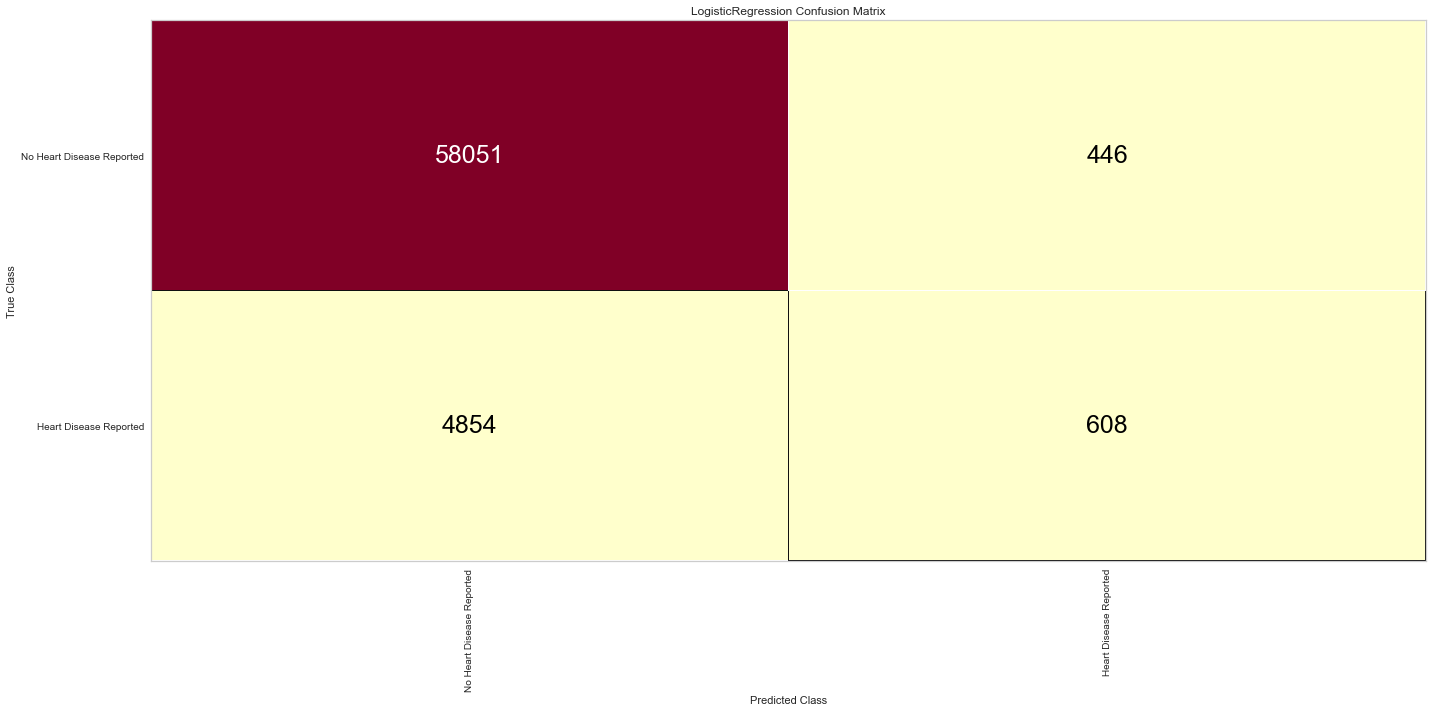

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [201]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

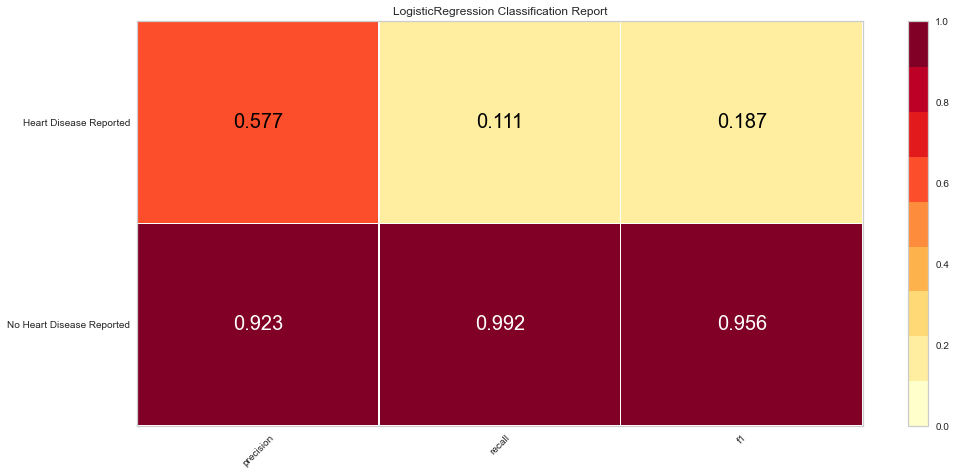

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [202]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

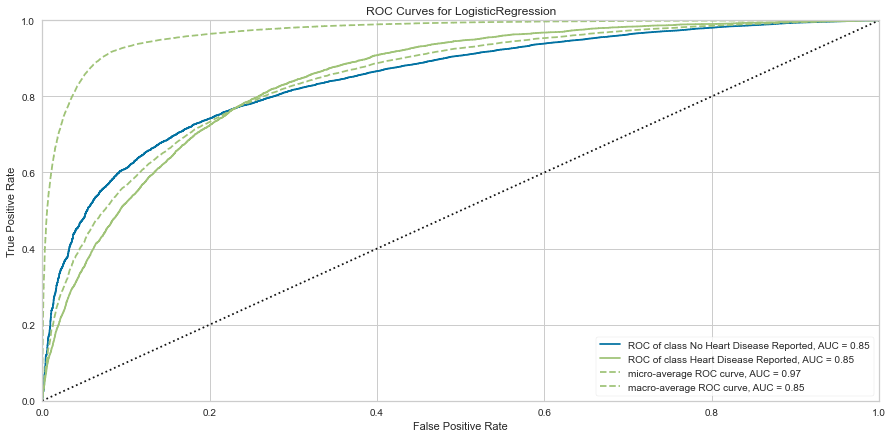

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [203]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logreg_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### 2nd Model: Fit a decision tree classifier on the training set.

In [204]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [205]:
# training the Decision Tree Classifier
clf_model = DecisionTreeClassifier() 
# Fit the Decision Tree model to the training data 
clf_model.fit(X_train,y_train)
# predict test dependent variable
y_pred_clf = clf_model.predict(X_test)

Model Accuracy: 86.44%


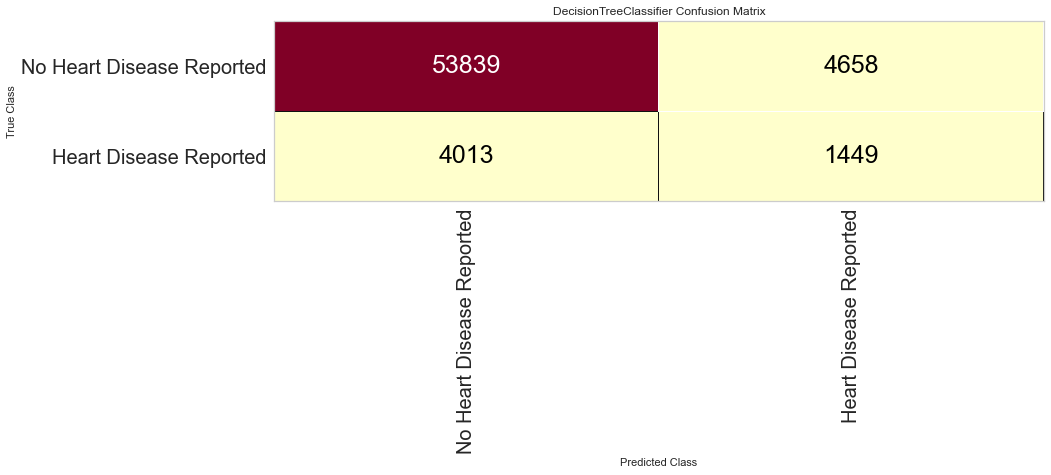

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [206]:
#get model accuracy and create a confusion matrix

# create class labels for confusion matrix
# Democrat is 0 and Republican is 1
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(clf_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

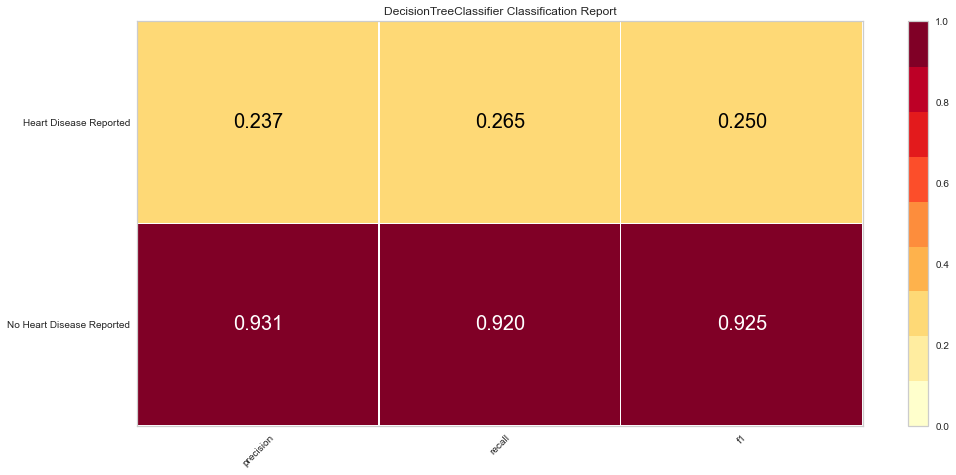

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [207]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(clf_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

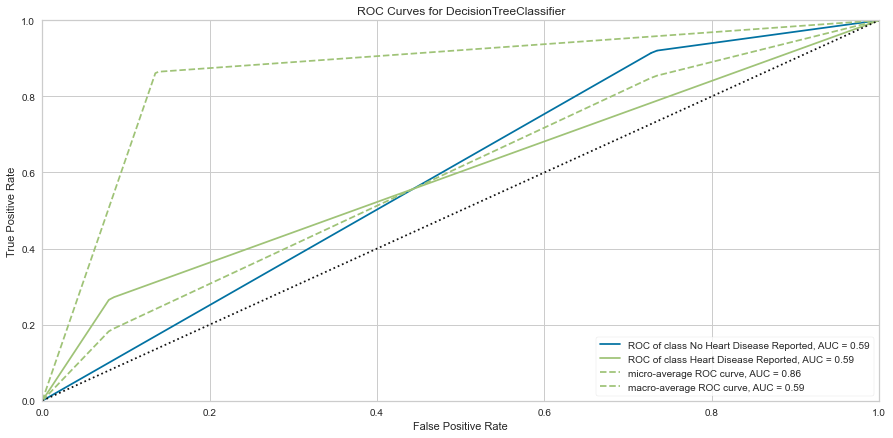

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [208]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(clf_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### Use X2 to find the 5 best features in the dataset and run the Logistic Regression Model and Decision Tree Classifier again

In [210]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [211]:
# Create target and feature_names list
features = X_train
target = y_train

In [212]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [213]:
# Show results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 37
Reduced number of features: 5


In [214]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new

,PhysicalHealth,Stroke_Yes,DiffWalking_Yes,Diabetic_Yes,GenHealth_Poor
0,10.0,0,0,0,0
1,0.0,0,0,0,0
2,0.0,0,0,0,0
3,0.0,0,0,0,0
4,2.0,0,0,1,0
...,...,...,...,...,...
255831,5.0,0,0,0,0
255832,27.0,0,0,0,0
255833,0.0,0,0,0,0
255834,0.0,0,0,0,0


In [89]:
df2.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [216]:
# STEP 3: split the data into a training and test set
X_chi = df2[['PhysicalHealth', 'Stroke_Yes', 'DiffWalking_Yes', 'Diabetic_Yes', 'GenHealth_Poor']]
#get the target
y_chi = df2['HeartDisease']

In [217]:
#split the data into training and test sets (80% Training/20% Test)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y_chi, test_size = 0.2)

In [218]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_chi = X_train_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_chi = X_test_chi.reset_index(drop = True)
y_train_chi = y_train_chi.reset_index(drop = True)
y_test_chi = y_test_chi.reset_index(drop = True)

### Run the Logistic Regression Model Again with 5 Best Features

In [219]:
#instantiate the logistic regression model 
logreg_model_5 = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model_5.fit(X_train_chi, y_train_chi) 
# Predicting on the test data
pred_test_chi = logreg_model_5.predict(X_test_chi)

Model Accuracy: 91.46%


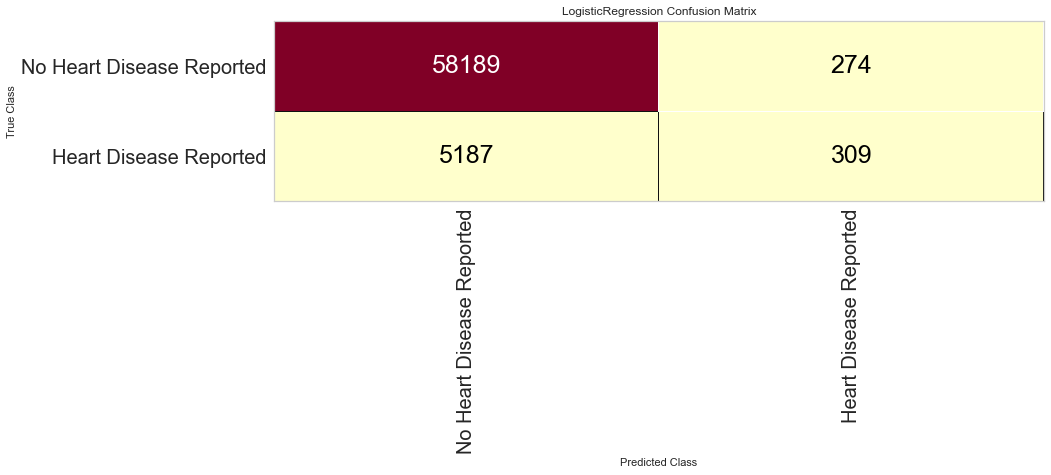

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [220]:
#get model accuracy and create a confusion matrix

# create class labels for confusion matrix
# Democrat is 0 and Republican is 1
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(logreg_model_5, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_chi, y_test_chi)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test_chi, y_test_chi)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

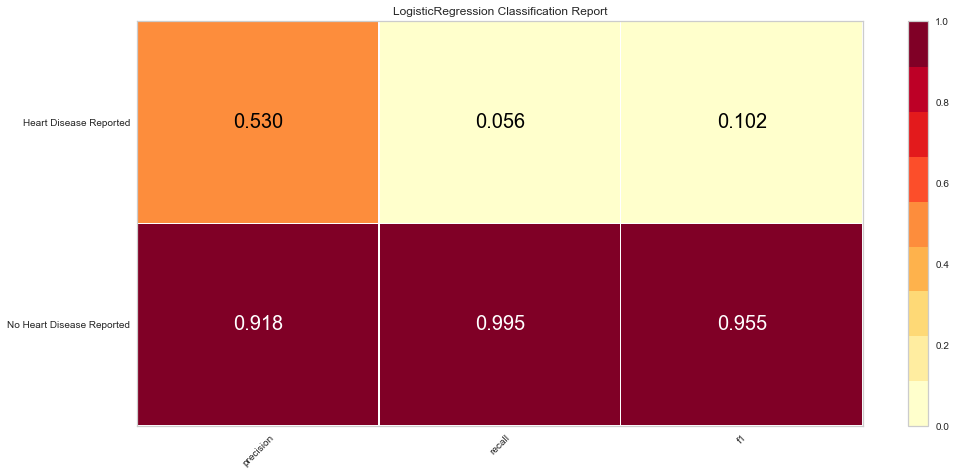

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [221]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model_5, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train_chi, y_test_chi)  
#evaluate the model on the test data
class_report.score(X_test_chi, y_test_chi)  
class_report.show()

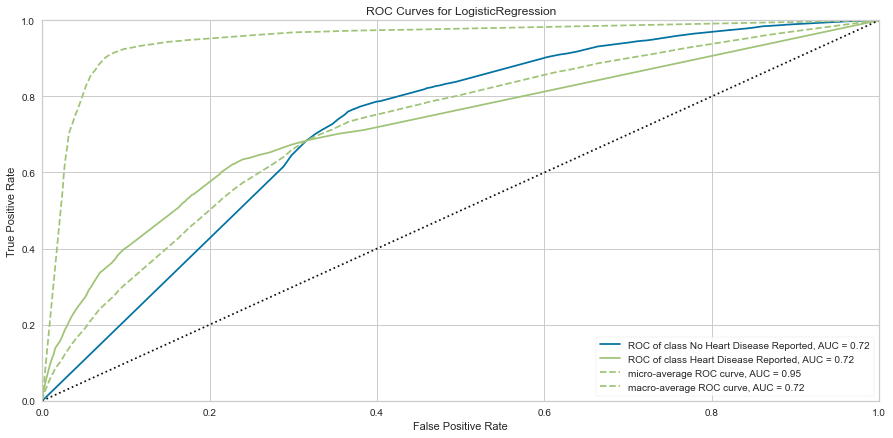

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [222]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logreg_model_5, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve.score(X_test_chi, y_test_chi)  
roc_curve.show()

### Run Decision Tree Classifier Again with 5 Best Features

In [223]:
# STEP 4: training the Decision Tree Classifier
clf_model_5 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model_5.fit(X_train_chi,y_train_chi)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Model Accuracy: 91.5%


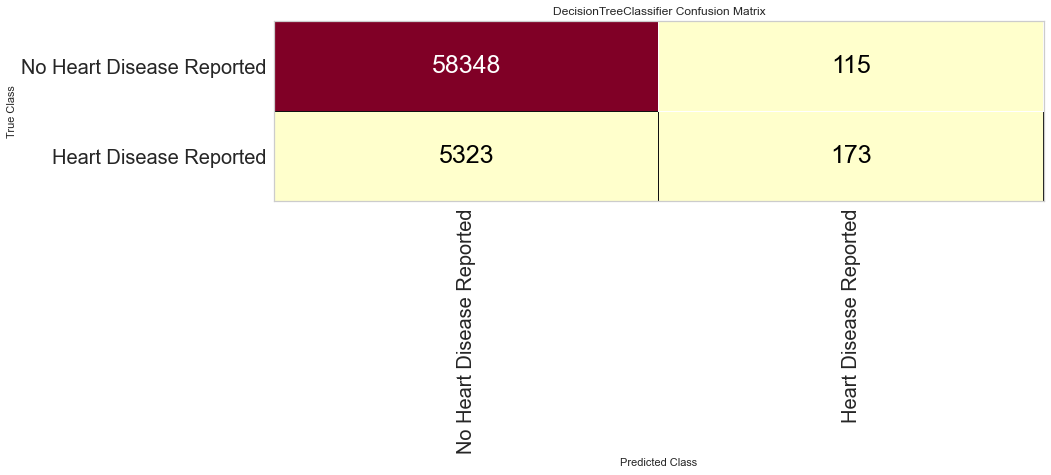

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [224]:
# STEP 5: get model accuracy and create a confusion matrix

# create class labels for confusion matrix
# Democrat is 0 and Republican is 1
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm= ConfusionMatrix(clf_model_5, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_chi, y_test_chi)

#creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm.score(X_test_chi, y_test_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

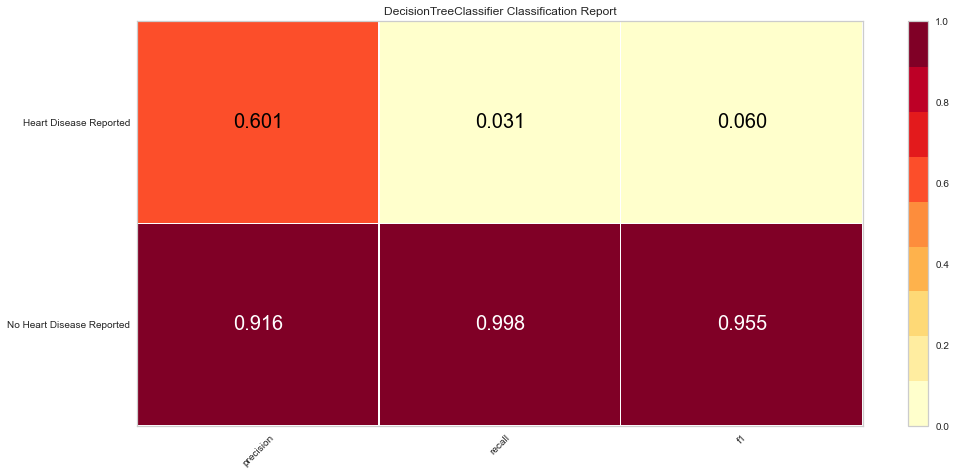

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [225]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(clf_model_5, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train_chi, y_test_chi)  
#evaluate the model on the test data
class_report.score(X_test_chi, y_test_chi)  
class_report.show()

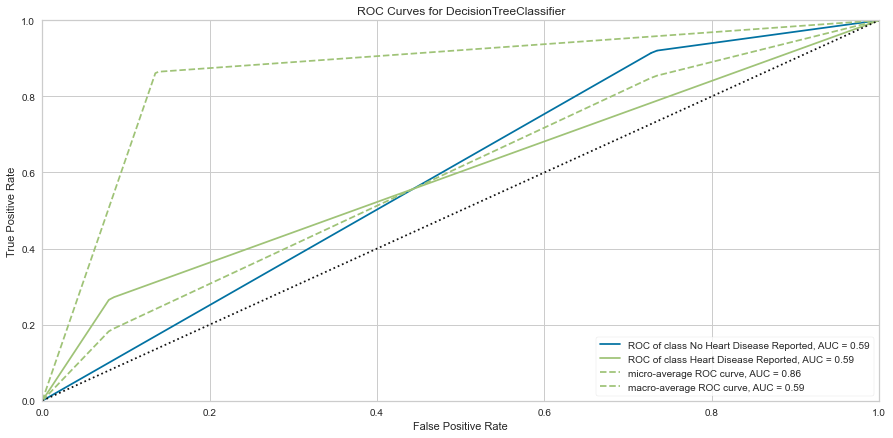

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [226]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(clf_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### Interpretations of Results

$\bullet$ LOGISTIC REGRESSION MODEL: Using 37 features, Logistic Regression model predicts heart disease with approximately $91\%$ accuracy and a model performance and AUC score of 0.84 which indicates the model has strong predictive power <br>
$\bullet$ LOGISTIC REGRESSION MODEL: Using the 5 best features, Logistic Regression model predicts heart disease with approximately the same accuracy as using 37 features, $91\%$. Additionally, the F1 score was relatively the same between using 37 or 5 features, and interestingly the AUC with 37 features was high $0.84$ (very good model performance) than with the 5 best features, $0.72$ (good model performance) <br>
$\bullet$ DECISION TREE: Using 37 features, the Decision Tree model predicts heart disease with approximately $86\%$ accuracy, and a model performance and AUC score of 0.58 (a model performance only as a good as random choice) <br>
$\bullet$ DECISION TREE: Using the 5 best features, the Decision Tree model predicts heart disease with better accuracy than using all 37 features, approximately $91\%$, but the AUC score of 0.58 (a model performance only as a good as random choice) <br>


### Conclusion & Recommendations

$\bullet$ The Logistic model with 37 features should be used as it has about the same accuracy and F1 score as the 5 best feature model, however it has a higher model performance in the AUC score (0.84) than the 5 best feature model. <br>
$\bullet$ The Decision Tree model with 5 features should not be used as its accuracy and AUC score was less than that of the Logistic Regression Model (and not much better than random choice) with 37 features. <br>
$\bullet$ The F1 score in all models for No Heart Disease Reported was over 0.92 which indicates that the model predicted those observsations correcly. However, the F1 score for Heart Disease Reported was low for all models, between 0.061-0.237 (a good F1 score should be above 0.9). This indicates that the model is performing poorly on the minority class (Heart Disease Reported) and this is because the dataset is imbalanced - there are so many more observations of No Heart Disease than observations with Heart Disease (class imbalance). Therefore, in the next section, my recommendation is to use the Logistic Regression Model with 37 features and balance the Heart Disease/No Heart Disease observations. To do this, we modifying the current training algorithm to take into account the skewed distribution of the classes by giving different weights to both the majority and minority classes. For the logistic regression, we use log loss as the cost function. <br>

### Logistic Regression Model with 37 Features and Class Weighting to address Class Imbalance

In [227]:
#instantiate the logistic regression model 
#logreg_model = LogisticRegression(max_iter = 500)
lr_weight = LogisticRegression(solver='newton-cg', class_weight='balanced')
#fit the model to the training set
lr_weight.fit(X_train, y_train)
# Predicting on the test data
pred_test_weight = lr_weight.predict(X_test)

Model Accuracy: 75.12%


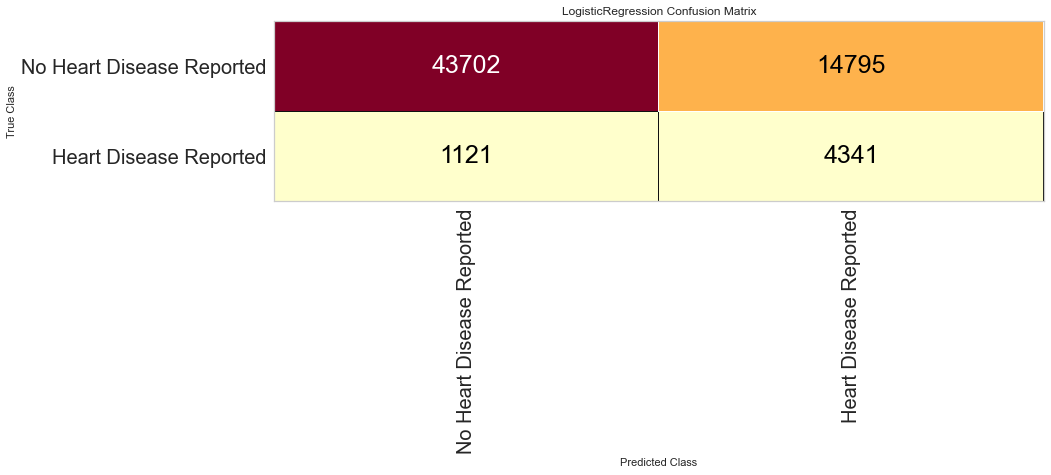

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [228]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(lr_weight, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

In [229]:
#Ploting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test_weight)

array([[43702, 14795],
       [ 1121,  4341]], dtype=int64)

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test_weight)

0.7511530824434404

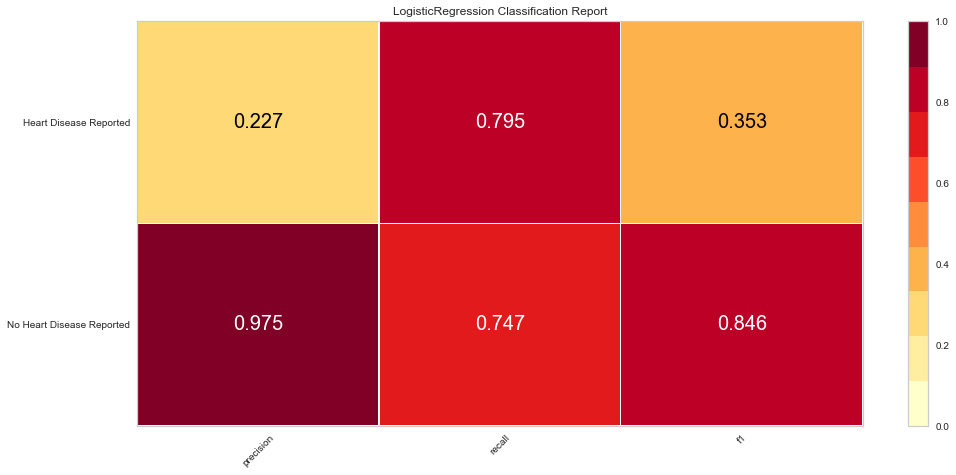

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [231]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(lr_weight, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

In [232]:
# Calculating and printing the f1 score  for the testing data
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, pred_test_weight)
print('The f1 score for the testing data:', f1_test)

The f1 score for the testing data: 0.35295552483941783


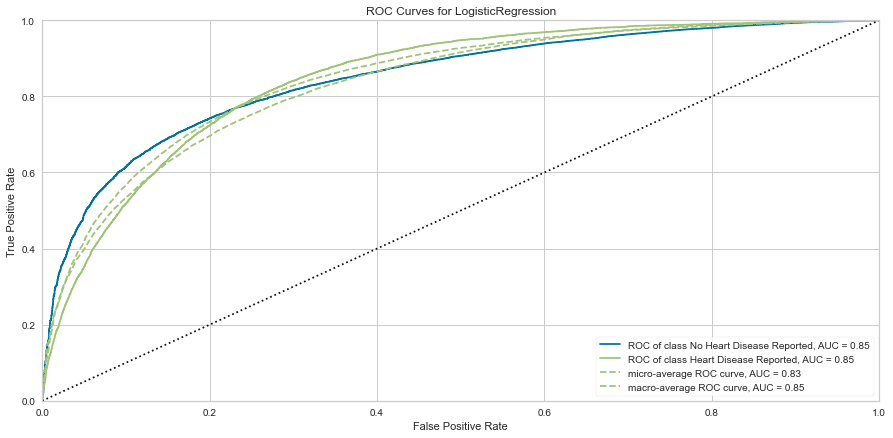

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [233]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(lr_weight, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### Improving the metric any further by changing the class manually

In [234]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr_weight = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr_weight, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\kadams\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

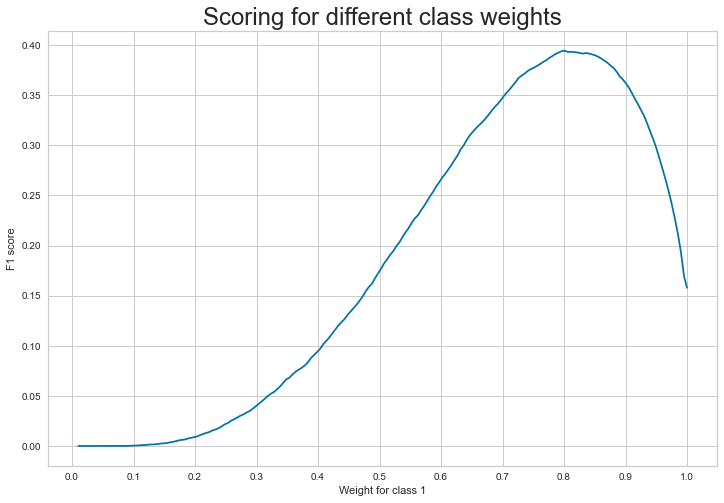

In [235]:
import seaborn as sns
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

### Through the graph above we can see that the highest value for the minority class is peaking at about 0.81 class weight.

In [240]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr_weight_grid = LogisticRegression(solver='newton-cg', class_weight={0: 0.19, 1: 0.81})
lr_weight_grid.fit(X_train, y_train)

# Predicting on the test data
pred_test_weight_grid = lr_weight_grid.predict(X_test)

#Calculating and printing the f1 score 
f1_test_grid = f1_score(y_test, pred_test_weight_grid)
print('The f1 score for the testing data:', f1_test_grid)

#Ploting the confusion matrix
confusion_matrix(y_test, pred_test_weight_grid)

The f1 score for the testing data: 0.4018133410088508


array([[52854,  5643],
       [ 2670,  2792]], dtype=int64)

Model Accuracy: 87.0%


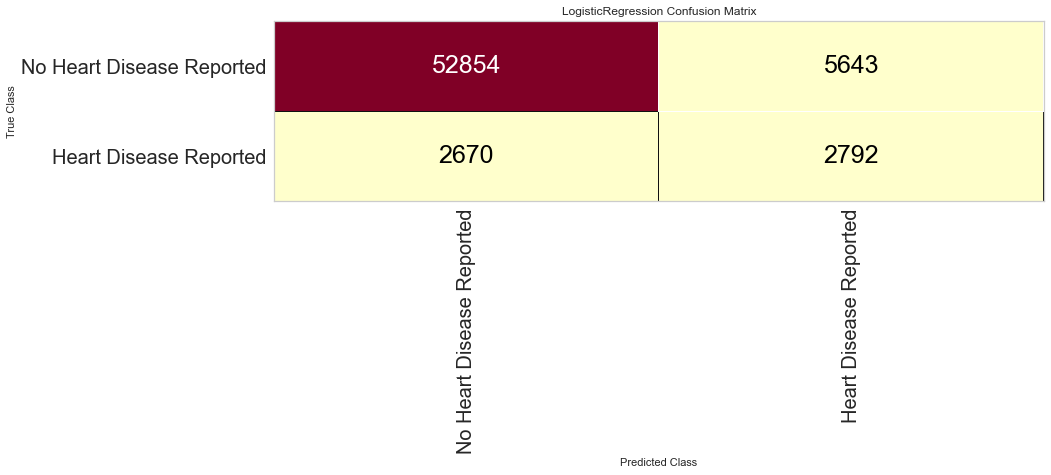

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [241]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(lr_weight_grid, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

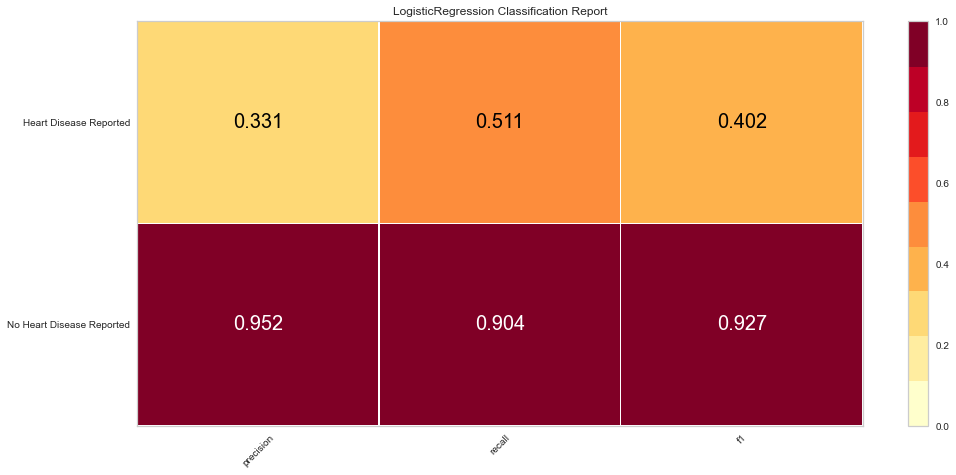

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [242]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(lr_weight_grid, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

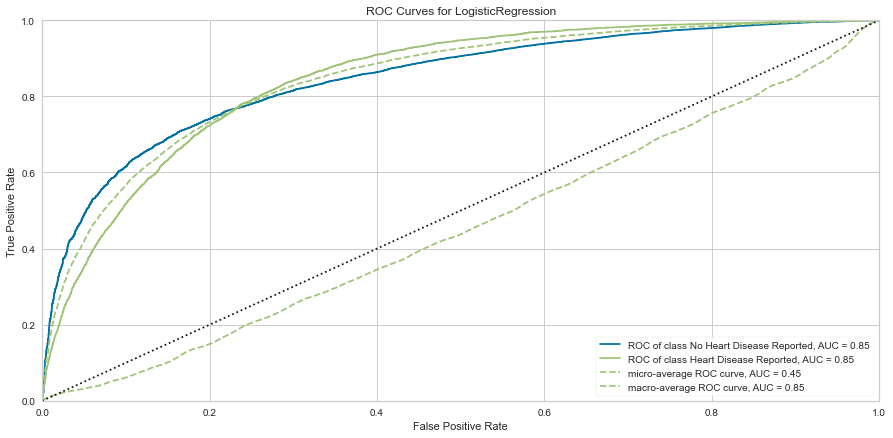

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [239]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(lr_weight_grid, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

In [ ]:
## Notes from Alex: 
### Regulation through a scalar & PCA
### sampling techniques (creating more occurences of the minority class)

In [262]:
df2.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


## PCA: Principal Component Analysis

In [312]:
### Regulation through a scalar & PCA (https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60#:~:text=A%20more%20common%20way%20of,most%20common%20application%20of%20PCA.
# get the features
X_pca = df2.drop(['HeartDisease'], axis = 1)
# get the target
y_pca = df2['HeartDisease']

In [313]:
# test_size: what proportion of original data is used for test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.2, random_state=0)
# train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [314]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_pca)
# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

In [315]:
from sklearn.decomposition import PCA
# Make an instance of the Model
# Note that the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(.95)

In [316]:
# Fit PCA on training set.
pca.fit(X_train_pca)

PCA(n_components=0.95)

In [317]:
# Apply the mapping (transform) to both the training set and the test set.
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

In [332]:
# check the shape of X_train_pca
print(X_train_pca.shape)
# PCA has lowered the features from 37 to 34

(255836, 34)


## Combine PCA with the logistic regression model with manual class balancing

In [325]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr_weight_grid_pca = LogisticRegression(solver='newton-cg', class_weight={0: 0.19, 1: 0.81})
lr_weight_grid_pca.fit(X_train_pca, y_train_pca)

# Predicting on the test data
pred_test_weight_grid_pca = lr_weight_grid_pca.predict(X_test_pca)

#Calculating and printing the f1 score 
f1_test_grid_pca = f1_score(y_test_pca, pred_test_weight_grid_pca)
print('The f1 score for the testing data:', f1_test_grid_pca)

#Ploting the confusion matrix
confusion_matrix(y_test_pca, pred_test_weight_grid_pca)

The f1 score for the testing data: 0.3800567248843111


array([[53107,  5405],
       [ 2901,  2546]], dtype=int64)

Model Accuracy: 87.01%


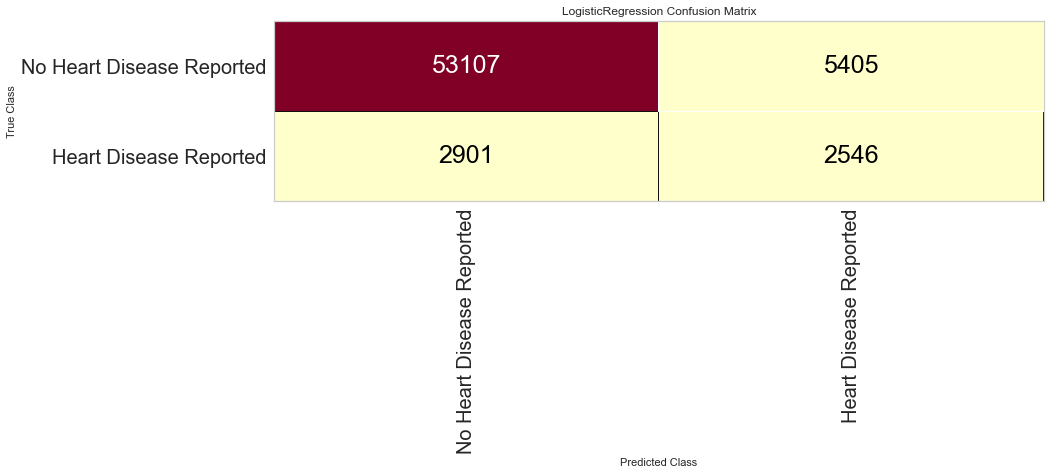

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [326]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(lr_weight_grid_pca, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_pca, y_test_pca)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test_pca, y_test_pca)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

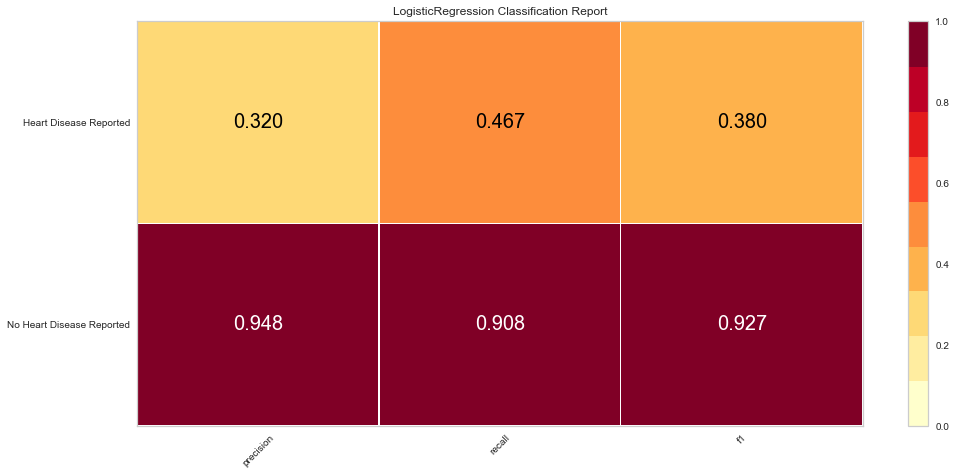

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [327]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(lr_weight_grid_pca, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train_pca, y_test_pca)  
#evaluate the model on the test data
class_report.score(X_test_pca, y_test_pca)  
class_report.show()

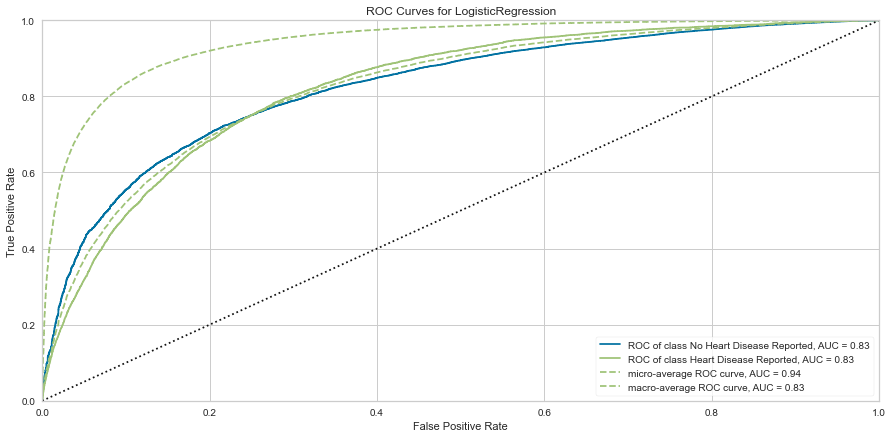

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [328]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(lr_weight_grid_pca, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_pca, y_test_pca)
#evaluate the model on the test data
roc_curve.score(X_test_pca, y_test_pca)  
roc_curve.show()

## PCA with regular Logistic Regression (no manual class balancing)

In [318]:
# make an instance of the Logistic Regression Model
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [319]:
# Training the model on the data, storing the information learned from the data
logisticRegr.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [320]:
# Predict for One Observation (image)
#logisticRegr.predict(X_test_pca[0].reshape(1,-1))
# Predict for One Observation (image)
logisticRegr.predict(X_test_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [321]:
# Measuring Model Performance
logisticRegr.score(X_test_pca, y_test_pca)

0.9153363873731609

Model Accuracy: 91.53%


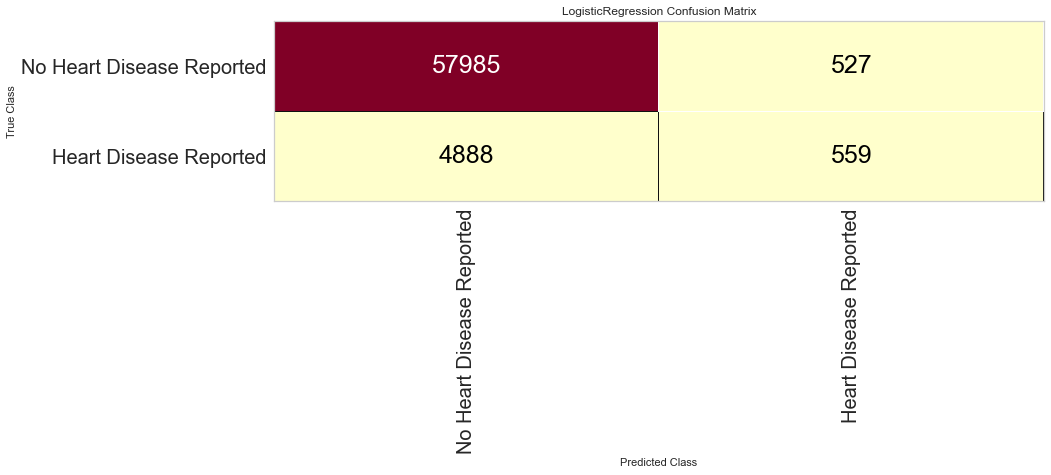

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [322]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(logisticRegr, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_pca, y_test_pca)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test_pca, y_test_pca)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

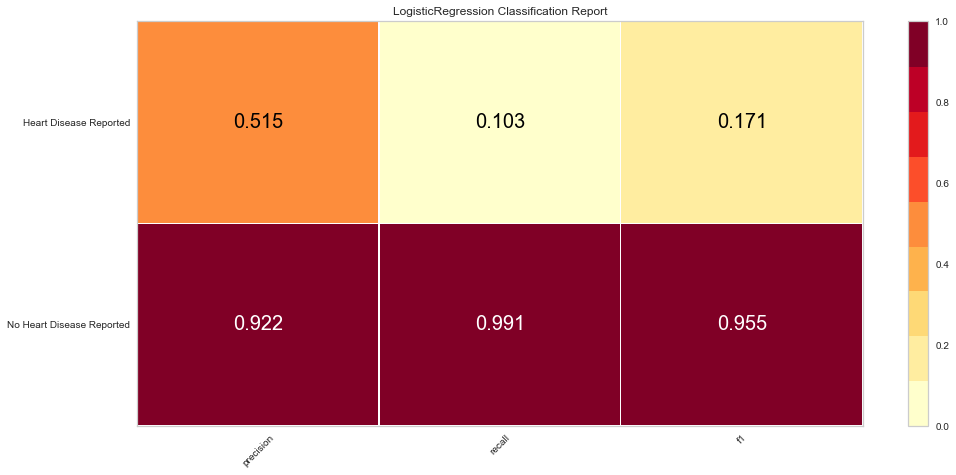

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [323]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logisticRegr, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train_pca, y_test_pca)  
#evaluate the model on the test data
class_report.score(X_test_pca, y_test_pca)  
class_report.show()

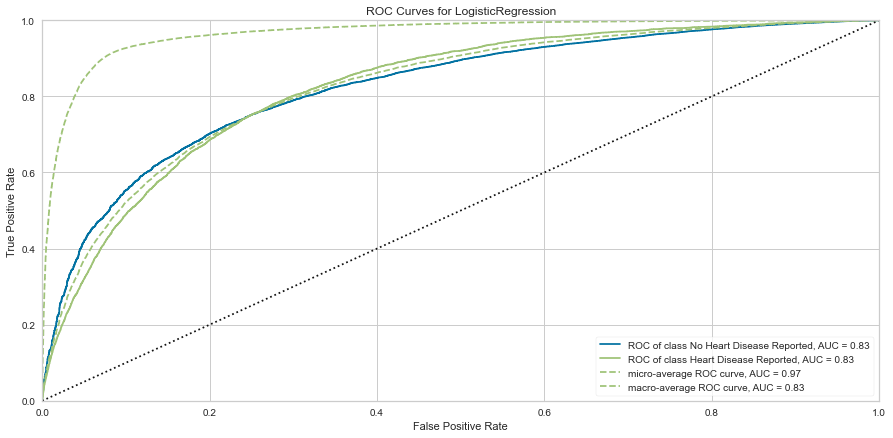

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [324]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logisticRegr, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test_pca, y_test_pca)
#evaluate the model on the test data
roc_curve.score(X_test_pca, y_test_pca)  
roc_curve.show()

## Logistic Regresssion with manual class weighting of X2: 5 Best Features

In [333]:
#importing and training the model
# X_train_chi, X_test_chi, y_train_chi, y_test_chi
from sklearn.linear_model import LogisticRegression
lr_weight_grid_chi = LogisticRegression(solver='newton-cg', class_weight={0: 0.19, 1: 0.81})
lr_weight_grid_chi.fit(X_train_chi, y_train_chi)

# Predicting on the test data
pred_test_weight_grid_chi = lr_weight_grid_chi.predict(X_test_chi)

#Calculating and printing the f1 score 
f1_test_grid_chi = f1_score(y_test_chi, pred_test_weight_grid_chi)
print('The f1 score for the testing data:', f1_test_grid_chi)

#Ploting the confusion matrix
confusion_matrix(y_test_chi, pred_test_weight_grid_chi)

The f1 score for the testing data: 0.3119214056300775


array([[55024,  3439],
       [ 3845,  1651]], dtype=int64)

Model Accuracy: 88.61%


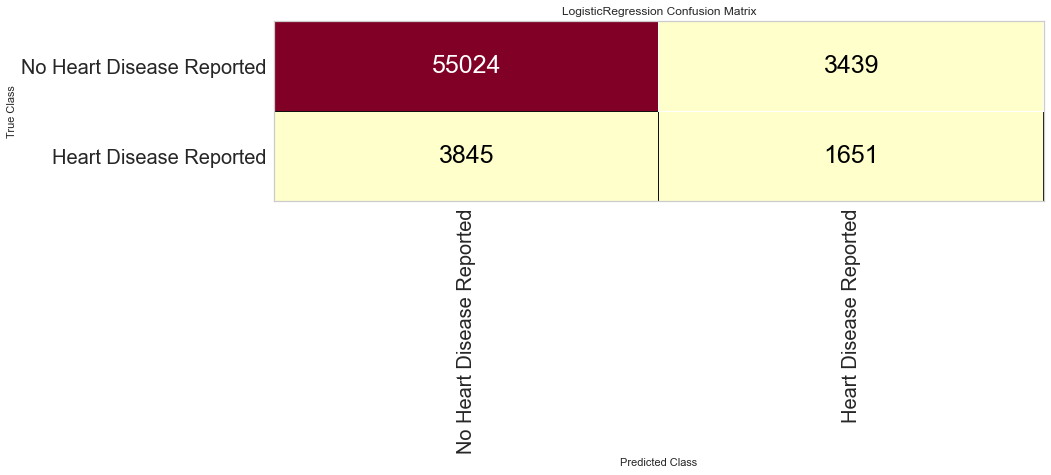

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [334]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['No Heart Disease Reported','Heart Disease Reported']
label_encoder = {0: 'No Heart Disease Reported', 1: 'Heart Disease Reported'}

#initialize the confusion matrix
cm = ConfusionMatrix(lr_weight_grid_chi, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_chi, y_test_chi)

#creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm.score(X_test_chi, y_test_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

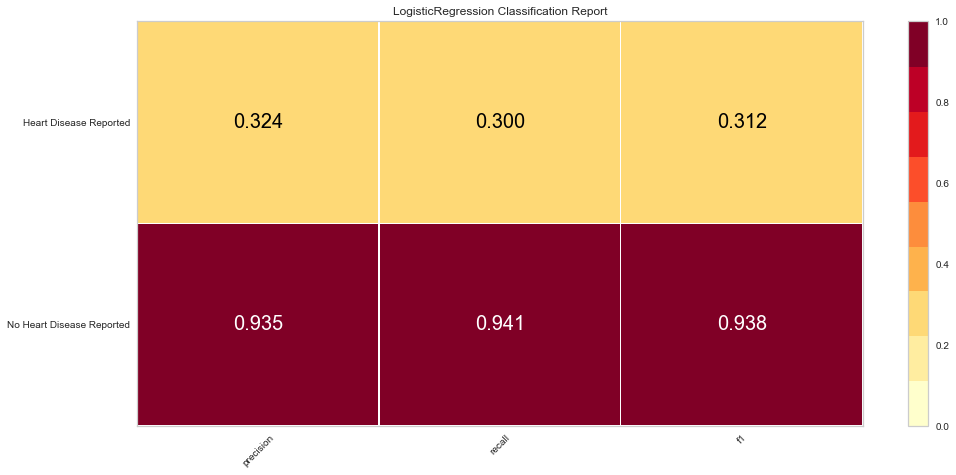

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [336]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(lr_weight_grid_chi, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train_chi, y_test_chi)  
#evaluate the model on the test data
class_report.score(X_test_chi, y_test_chi)  
class_report.show()

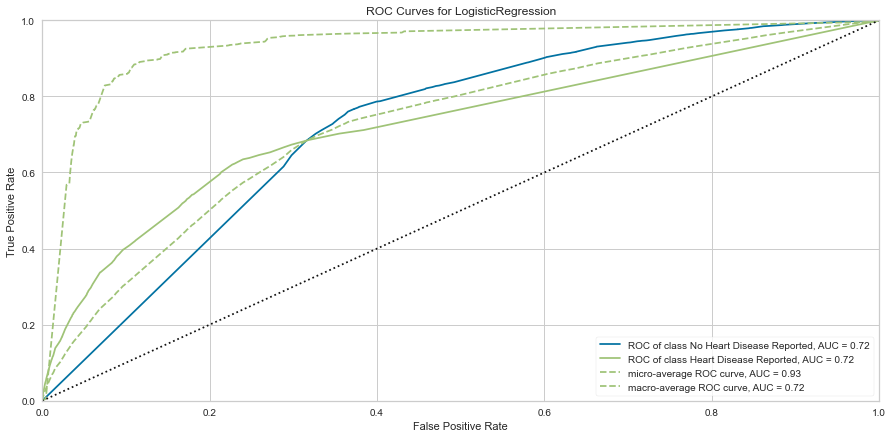

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [337]:
# ROC and AUC
#Instantiate the visualizer
roc_curve_chi = ROCAUC(lr_weight_grid_chi, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve_chi.fit(X_test_chi, y_test_chi)
#evaluate the model on the test data
roc_curve_chi.score(X_test_chi, y_test_chi)  
roc_curve_chi.show()